## Initial Assumptions and Predictions:

### Assumptions:
1. Each user will have varying levels of activity based on their lifestyle and usage of Fitbit.
2. Inactivity is defined as any hour with fewer than 100 steps, and users should aim to stay active for at least 10 hours per day.
3. Minute-level data will reveal bursts of activity, while hourly data will help identify extended periods of inactivity.

### Predictions:
- At least one of the users will likely exceed 10 hours of inactivity per day.
- Users will exhibit varying step patterns, with some showing consistent activity and others displaying sporadic bursts.

In [8]:
# prompt: Access My Drive/DATA3406 and get all  csv

from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/DATA3406'  # Replace with your actual directory path



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/DATA3406/dailySteps_merged.csv', '/content/drive/MyDrive/DATA3406/hourlySteps_merged.csv', '/content/drive/MyDrive/DATA3406/minuteStepsWide_merged.csv']


## Daily Step Count Analysis

This section calculates the daily step statistics for each user. For each person, I will calculate:
1. The total number of days for which we have data.
2. The average step count per day.
3. The maximum and minimum step count.
4. An additional observation on the consistency of their daily activity levels.

## Step 1: Data Loading and Filtering

We begin by loading the data for each of the three selected users and filtering out their specific daily, hourly, and minute-level step data.

In [12]:
import pandas as pd
daily_steps = pd.read_csv(str(data_dir) + '/dailySteps_merged.csv')
hourly_steps = pd.read_csv(str(data_dir) + '/hourlySteps_merged.csv')
minute_steps = pd.read_csv(str(data_dir)+ '/minuteStepsWide_merged.csv')

print(daily_steps.head())
print(hourly_steps.head())
print(minute_steps.head())


           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0
           Id           ActivityHour  Steps00  Steps01  Steps02  Steps03  \
0  1503960366  4/13/2016 12:00:00 AM        4       16        0        0   
1  1503960366   4/13/2016 1:00:00 AM        0        0        0        0   
2  1503960366   4/13/2016 2:00:00 AM        0        0        0        0   
3  1503960366   4/13/2016 3:00:00 AM        0        0        0        0   
4  1503960366   4/13/2016 4:00:00 AM        0        0        0        0   

   Steps04  Steps05  Steps06  Ste

In [13]:

import random

#Get seed
random.seed(42)

unique_ids = daily_steps['Id'].unique().tolist()

selected_ids = random.sample(unique_ids, 3)
print(selected_ids)

# Define the inactivity threshold (e.g., fewer than 100 steps per hour is considered inactive)
inactivity_threshold = 100

[2320127002, 1624580081, 4558609924]


In [14]:
user_analysis = {}

# Loop through each of the selected users for detailed analysis
for user_id in selected_ids:

    # Filter the daily, hourly, and minute-level data for the specific user
    user_daily_data = daily_steps[daily_steps['Id'] == user_id]
    user_hourly_data = hourly_steps[hourly_steps['Id'] == user_id]
    user_minute_data = minute_steps[minute_steps['Id'] == user_id]

    # Proceed to analyze each user

## Step 2: Daily Step Count Analysis

In this step, we calculate the total number of days of data for the user, along with the average, maximum, and minimum number of steps per day.

In [15]:
# Loop through each user for daily step count analysis
for user_id in selected_ids:
    user_daily_data = daily_steps[daily_steps['Id'] == user_id]

    # Step 1: Calculate daily statistics
    total_days = len(user_daily_data)  # Total number of days of data
    daily_avg = user_daily_data['StepTotal'].mean()  # Average steps per day
    daily_max = user_daily_data['StepTotal'].max()  # Maximum steps on a day
    daily_min = user_daily_data['StepTotal'].min()  # Minimum steps on a day

    # Store results in the dictionary
    if user_id not in user_analysis:
        user_analysis[user_id] = {}

    user_analysis[user_id]['total_days'] = total_days
    user_analysis[user_id]['daily_avg'] = daily_avg
    user_analysis[user_id]['daily_max'] = daily_max
    user_analysis[user_id]['daily_min'] = daily_min

## Step 3: Minute-Level Step Count Analysis

Now we analyze minute-level data, focusing on the number of active (non-zero) minutes, missing data, and the average, maximum, and minimum steps taken in a minute. We also make an additional observation about burst activity based on the maximum steps in a minute.

In [16]:
# Loop through each user for minute-level step count analysis
for user_id in selected_ids:
    user_minute_data = minute_steps[minute_steps['Id'] == user_id]
    user_minute_steps = user_minute_data.iloc[:, 2:]  # Step columns are from index 2 onwards

    total_non_zero_minutes = (user_minute_steps > 0).sum().sum()  # Total non-zero minutes
    missing_data = user_minute_steps.isnull().sum().sum()  # Missing data
    avg_steps_per_minute = user_minute_steps.mean().mean()  # Average steps per minute
    max_steps_per_minute = user_minute_steps.max().max()  # Maximum steps in a minute
    min_steps_per_minute = user_minute_steps.min().min()  # Minimum steps in a minute

    # Additional observation: Analyze burst activity
    active_periods_observation = "User shows frequent bursts of activity." \
        if max_steps_per_minute > 150 else "User's activity is more spread out throughout the day."

    # Store minute-level data in the user dictionary
    user_analysis[user_id]['non_zero_minutes'] = total_non_zero_minutes
    user_analysis[user_id]['missing_data'] = missing_data
    user_analysis[user_id]['avg_steps_per_minute'] = avg_steps_per_minute
    user_analysis[user_id]['max_steps_per_minute'] = max_steps_per_minute
    user_analysis[user_id]['min_steps_per_minute'] = min_steps_per_minute
    user_analysis[user_id]['active_periods_observation'] = active_periods_observation

In [17]:
# Loop through each user for inactive hours calculation
for user_id in selected_ids:
    user_hourly_data = hourly_steps[hourly_steps['Id'] == user_id]

    # Step 3: Calculate inactive hours (hours where steps < inactivity threshold)
    inactive_hours = (user_hourly_data['StepTotal'] < inactivity_threshold).sum()

    # Store the inactive hours in the user dictionary
    user_analysis[user_id]['inactive_hours'] = inactive_hours

In [18]:
# Convert the results into a DataFrame for easier viewing and interpretation
user_analysis_df = pd.DataFrame(user_analysis).T

user_analysis_df

,total_days,daily_avg,daily_max,daily_min,non_zero_minutes,missing_data,avg_steps_per_minute,max_steps_per_minute,min_steps_per_minute,active_periods_observation,inactive_hours
2320127002,31,4716.870968,10725,772,6079,0,3.161614,123,0,User's activity is more spread out throughout ...,394
1624580081,31,5743.903226,36019,1510,3679,0,3.975217,184,0,User shows frequent bursts of activity.,461
4558609924,31,7685.129032,13743,3428,9193,0,5.503231,207,0,User shows frequent bursts of activity.,336


In [19]:
# Identifying sleep patterns byn year
# Identify when hours inactive when they are awake
# Identify hours inactive when including sleep
# # Identify trends through the years - increaings /decreasing inactivity


# Filter data for one user (example user: '1503960366')
user_id = 1503960366
daily_steps_user = daily_steps[daily_steps['Id'] == user_id]
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id]
minute_steps_user = minute_steps[minute_steps['Id'] == user_id]

# print(daily_steps_user)
print(hourly_steps_user) # This is the most useful data set for this task
# print(minute_steps_user)




             Id           ActivityHour  StepTotal
0    1503960366  4/12/2016 12:00:00 AM        373
1    1503960366   4/12/2016 1:00:00 AM        160
2    1503960366   4/12/2016 2:00:00 AM        151
3    1503960366   4/12/2016 3:00:00 AM          0
4    1503960366   4/12/2016 4:00:00 AM          0
..          ...                    ...        ...
712  1503960366   5/11/2016 4:00:00 PM        289
713  1503960366   5/11/2016 5:00:00 PM        245
714  1503960366   5/11/2016 6:00:00 PM       3449
715  1503960366   5/11/2016 7:00:00 PM        293
716  1503960366   5/11/2016 8:00:00 PM       1209

[717 rows x 3 columns]


In [20]:
#Identifying sleeping hours!!

# Filter data for one user (example user: '1503960366')
user_id = 1503960366
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id]

# Create a copy of the DataFrame to work with, so the original is not altered
hourly_steps_user_copy = hourly_steps_user.copy()

# Convert 'ActivityHour' to datetime in the copy of the DataFrame
hourly_steps_user_copy['ActivityHour'] = pd.to_datetime(hourly_steps_user_copy['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Define night hours (sleep hours: 10:00 PM to 6:00 AM)
sleep_hours_start = '22:00:00'  # 10:00 PM
sleep_hours_end = '07:00:00'    # 6:00 AM


In [21]:
# Filter for night hours in the copy
hourly_steps_user_copy['hour'] = hourly_steps_user_copy['ActivityHour'].dt.time
night_hours_filter = (hourly_steps_user_copy['ActivityHour'].dt.time >= pd.to_datetime(sleep_hours_start).time()) | \
                     (hourly_steps_user_copy['ActivityHour'].dt.time <= pd.to_datetime(sleep_hours_end).time())


hourly_steps_night = hourly_steps_user_copy[night_hours_filter]
print(hourly_steps_night)


             Id        ActivityHour  StepTotal      hour
0    1503960366 2016-04-12 00:00:00        373  00:00:00
1    1503960366 2016-04-12 01:00:00        160  01:00:00
2    1503960366 2016-04-12 02:00:00        151  02:00:00
3    1503960366 2016-04-12 03:00:00          0  03:00:00
4    1503960366 2016-04-12 04:00:00          0  04:00:00
..          ...                 ...        ...       ...
699  1503960366 2016-05-11 03:00:00         10  03:00:00
700  1503960366 2016-05-11 04:00:00          0  04:00:00
701  1503960366 2016-05-11 05:00:00          0  05:00:00
702  1503960366 2016-05-11 06:00:00          0  06:00:00
703  1503960366 2016-05-11 07:00:00         47  07:00:00

[298 rows x 4 columns]


In [22]:
# Define inactivity as zero or very low step count (e.g., < 100 steps)
inactive_sleep_hours = hourly_steps_night[hourly_steps_night['StepTotal'] < 100]

# Print out the identified inactive sleep hours
print("Identified sleep hours for user with inactivity:")
print(inactive_sleep_hours[['ActivityHour', 'StepTotal']])


Identified sleep hours for user with inactivity:
           ActivityHour  StepTotal
3   2016-04-12 03:00:00          0
4   2016-04-12 04:00:00          0
5   2016-04-12 05:00:00          0
6   2016-04-12 06:00:00          0
7   2016-04-12 07:00:00          0
..                  ...        ...
699 2016-05-11 03:00:00         10
700 2016-05-11 04:00:00          0
701 2016-05-11 05:00:00          0
702 2016-05-11 06:00:00          0
703 2016-05-11 07:00:00         47

[230 rows x 2 columns]


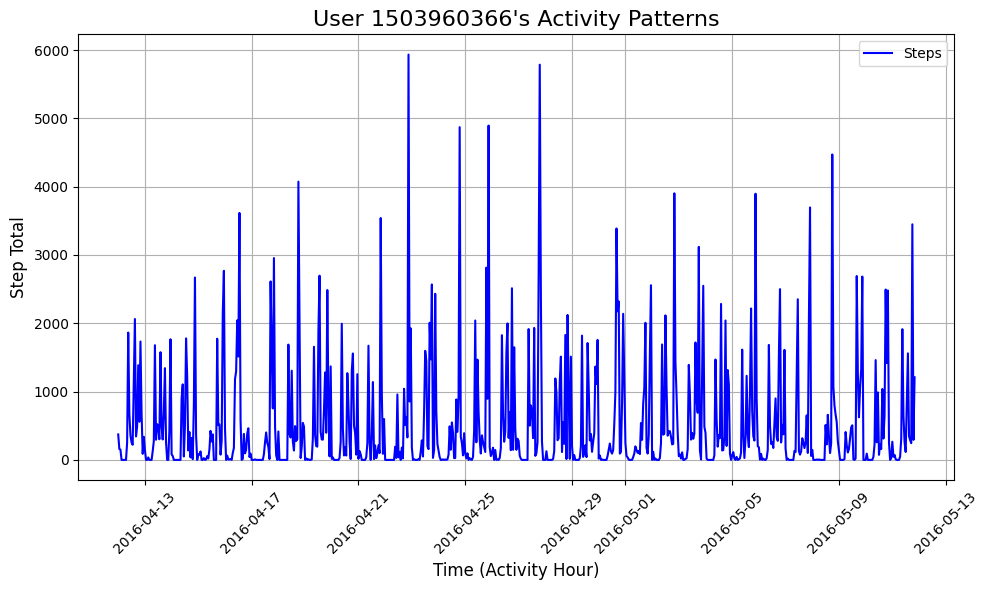

In [23]:
import matplotlib.pyplot as plt

# Filter data for one user (example user: '1503960366')
user_id = 1503960366
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

# Convert 'ActivityHour' to datetime
hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Plotting activity patterns
plt.figure(figsize=(10, 6))
plt.plot(hourly_steps_user['ActivityHour'], hourly_steps_user['StepTotal'], label='Steps', color='b')

# Formatting the plot
plt.title(f"User {user_id}'s Activity Patterns", fontsize=16)
plt.xlabel('Time (Activity Hour)', fontsize=12)
plt.ylabel('Step Total', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

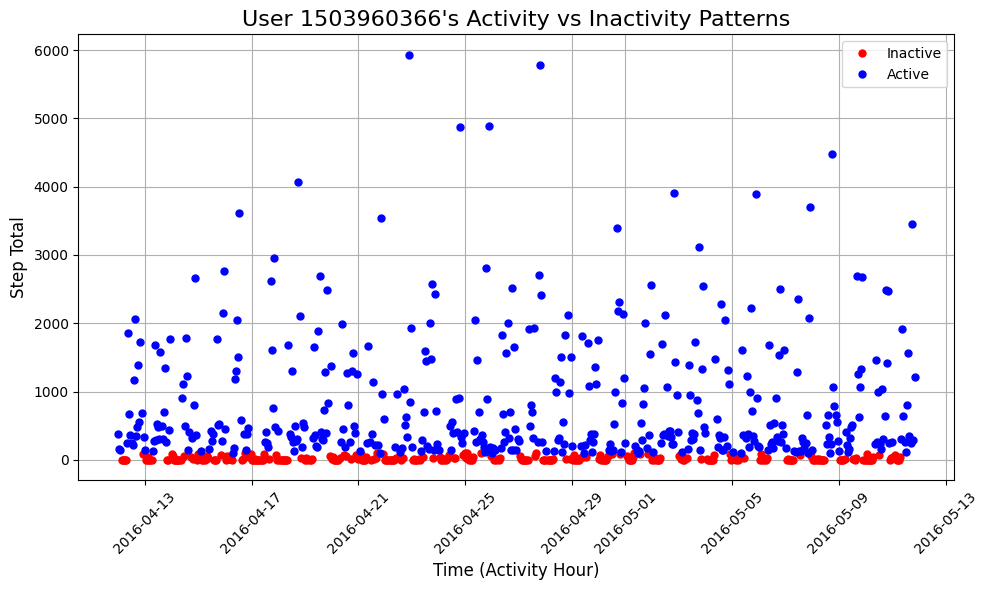

In [24]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for one user (example user: '1503960366')
user_id = 1503960366
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

# Convert 'ActivityHour' to datetime
hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Define threshold for inactivity (e.g., less than 100 steps is considered inactive)
inactive_threshold = 100

# Create a new column 'ActivityStatus' to classify activity vs inactivity
hourly_steps_user['ActivityStatus'] = hourly_steps_user['StepTotal'].apply(lambda x: 'Active' if x >= inactive_threshold else 'Inactive')

# Plotting active vs inactive periods
plt.figure(figsize=(10, 6))

# Plot inactive periods (steps below threshold)
inactive_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Inactive']
plt.plot(inactive_periods['ActivityHour'], inactive_periods['StepTotal'], 'ro', label='Inactive', markersize=5)

# Plot active periods (steps above threshold)
active_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Active']
plt.plot(active_periods['ActivityHour'], active_periods['StepTotal'], 'bo', label='Active', markersize=5)

# Formatting the plot
plt.title(f"User {user_id}'s Activity vs Inactivity Patterns", fontsize=16)
plt.xlabel('Time (Activity Hour)', fontsize=12)
plt.ylabel('Step Total', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [31]:

# Function to calculate average daily step count for a specific user
def calculate_inactivity_including_sleep(user_id, daily_steps):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 100 steps per day, including all periods (including sleep).

    Parameters:
    user_id (int): The ID of the user to analyze
    daily_steps (DataFrame): The daily steps dataset containing 'Id' and 'StepTotal'

    Returns:
    average_daily_steps (float): The average daily step count for the user
    is_inactive (bool): True if the average daily step count is less than 100, False otherwise
    """
    # Filter data for the specific user
    daily_steps_user = daily_steps[daily_steps['Id'] == user_id].copy()

    # Calculate the average daily step count
    average_daily_steps = daily_steps_user['StepTotal'].mean()

    # Determine if the user is inactive (average steps < 100)
    is_inactive = average_daily_steps < 100

    # Return the result
    return average_daily_steps, is_inactive

# Example usage
user_id = 1503960366  # Replace with the user ID of your choice
average_steps, inactive_including_sleep = calculate_inactivity_including_sleep(user_id, daily_steps)

# Output the result
print(f"User {user_id}'s average daily step count is {average_steps:.2f}")
if inactive_including_sleep:
    print(f"User {user_id} is inactive (average daily step count is less than 100), including sleep periods.")
else:
    print(f"User {user_id} is active (average daily step count is 100 or more), including sleep periods.")

User 1503960366's average daily step count is 12116.74
User 1503960366 is active (average daily step count is 100 or more), including sleep periods.


#CREATES RANDOM USERS


In [29]:
def get_random_users(df, num_users=1, seed=None):
    """
    This function selects random users from the dataset.

    Parameters:
    df (DataFrame): The DataFrame containing the data with user 'Id' column.
    num_users (int): The number of random users to select (default is 1).
    seed (int): Random seed for reproducibility (optional).

    Returns:
    List of random user IDs.
    """
    # Set the random seed if provided (optional for reproducibility)
    if seed is not None:
        random.seed(seed)

    # Get the unique user IDs from the dataset
    unique_users = df['Id'].unique()

    # Select the random users
    random_users = random.sample(list(unique_users), num_users)

    return random_users

# Example usage
random_users = get_random_users(daily_steps, num_users=3, seed=42)  # Select 3 random users
print("Randomly selected user IDs:", random_users)

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]


In [30]:
import pandas as pd

# Function to calculate average daily step count excluding sleep periods
def calculate_inactivity_excluding_sleep(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00'):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 100 steps per day, excluding sleep periods.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)

    Returns:
    average_daily_steps (float): The average daily step count for the user excluding sleep
    is_inactive (bool): True if the average daily step count is less than 100, False otherwise
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define night hours (sleep hours: 10:00 PM to 6:00 AM)
    sleep_hours_start = pd.to_datetime(sleep_start).time()
    sleep_hours_end = pd.to_datetime(sleep_end).time()

    # Filter out the hours that are during the sleep period
    waking_hours = hourly_steps_user[
        (hourly_steps_user['ActivityHour'].dt.time < sleep_hours_start) &
        (hourly_steps_user['ActivityHour'].dt.time > sleep_hours_end)]

    # Calculate total steps per day excluding sleep periods
    daily_steps_excluding_sleep = waking_hours.groupby(waking_hours['ActivityHour'].dt.date)['StepTotal'].sum()
    print(daily_steps_excluding_sleep)

    # Calculate the average daily steps excluding sleep periods
    average_daily_steps_excluding_sleep = daily_steps_excluding_sleep.mean()

    # Determine if the user is inactive (average steps < 100)
    is_inactive_excluding_sleep = average_daily_steps_excluding_sleep < 100

    # Return the result
    return average_daily_steps_excluding_sleep, is_inactive_excluding_sleep

# Example usage
user_id = 2320127002  # Replace with the user ID of your choice
average_steps_excluding_sleep, inactive_excluding_sleep = calculate_inactivity_excluding_sleep(user_id, hourly_steps)

# Output the result
print(f"User {user_id}'s average daily step count excluding sleep is {average_steps_excluding_sleep:.2f}")
if inactive_excluding_sleep:
    print(f"User {user_id} is inactive (average daily step count is less than 100), excluding sleep periods.")
else:
    print(f"User {user_id} is active (average daily step count is 100 or more), excluding sleep periods.")

ActivityHour
2016-04-12    10121
2016-04-13     5150
2016-04-14     3614
2016-04-15     5088
2016-04-16     3820
2016-04-17     5688
2016-04-18     6030
2016-04-19     3756
2016-04-20     6179
2016-04-21     2526
2016-04-22     3301
2016-04-23     3842
2016-04-24     2985
2016-04-25     2449
2016-04-26     2314
2016-04-27     1480
2016-04-28      251
2016-04-29      683
2016-04-30     2404
2016-05-01        0
2016-05-02     2065
2016-05-03     5152
2016-05-04      874
2016-05-05     4761
2016-05-06     3679
2016-05-07     6136
2016-05-08     4529
2016-05-09     2064
2016-05-10     6156
2016-05-11     5391
2016-05-12     2564
Name: StepTotal, dtype: int64
User 2320127002's average daily step count excluding sleep is 3711.35
User 2320127002 is active (average daily step count is 100 or more), excluding sleep periods.
